# Imports

In [72]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from opdproblem.OPDproblem import OPDGraph
from opdproblem.Alg import Alg
from opdproblem.Utils import exp_alg, bar_plot, box_plot, plot_opd_graph, plot_opd_graph_3d
from opdproblem import seed



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creación y visualización de un grafo OPD

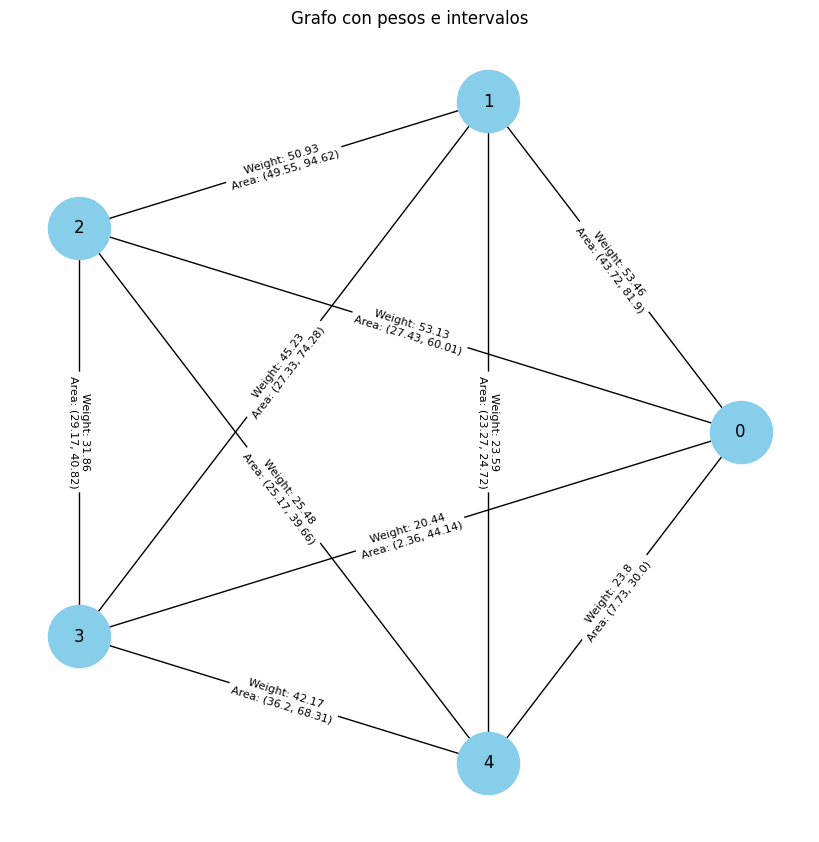

In [73]:
seed(1)
# Crear un grafo OPD con 5 nodos, con pesos entre 1 y 10
opd = OPDGraph(n=5, limit_sup=10, area_type='bounded_non_homogeneous')

# Visualizar el grafo generado
plot_opd_graph(opd)


In [79]:
plot_opd_graph_3d(opd)

# Ejemplo de búsqueda utilizando algoritmos

In [75]:
# Inicializar el algoritmo con el grafo OPD creado
search = Alg(opd)

# Usar el algoritmo de búsqueda con el método 'inf'
cert_inf = search.search_app(method='inf')
print("Certificado encontrado utilizando 'inf':", cert_inf)

# Usar el algoritmo de búsqueda con el método 'random1'
cert_random = search.search_app(method='random1')
print("Certificado encontrado utilizando 'random1':", cert_random)

cert_both = search.both_alg()
print("Certificado encontrado utilizando 'both':", cert_both)

Certificado encontrado utilizando 'inf': [(0, 1), (0, 4), (0, 3), (1, 4), (1, 3)]
Certificado encontrado utilizando 'random1': [(0, 1), (0, 4), (0, 3), (1, 4), (1, 3)]
Certificado encontrado utilizando 'both': [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]


# Realización de experimentos y visualización

Procesando clique: 100%|██████████| 17/17 [00:02<00:00,  5.98clique/s]


  clique                       inf                                    random  \
0     k4                  [(0, 1)]                                  [(0, 1)]   
1     k4  [(2, 3), (0, 2), (1, 3)]  [(0, 1), (1, 2), (2, 3), (0, 2), (1, 3)]   
2     k4                  [(0, 1)]                                  [(0, 1)]   
3     k4                  [(0, 1)]                                  [(0, 1)]   
4     k4                  [(0, 1)]                                  [(0, 1)]   

                                       both  \
0                                  [(0, 1)]   
1  [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]   
2                                  [(0, 1)]   
3                                  [(0, 1)]   
4                                  [(0, 1)]   

                                                 opd  
0  <opdproblem.OPDproblem.OPDGraph object at 0x72...  
1  <opdproblem.OPDproblem.OPDGraph object at 0x72...  
2  <opdproblem.OPDproblem.OPDGraph object at 0x72...  
3  <opdproblem.O

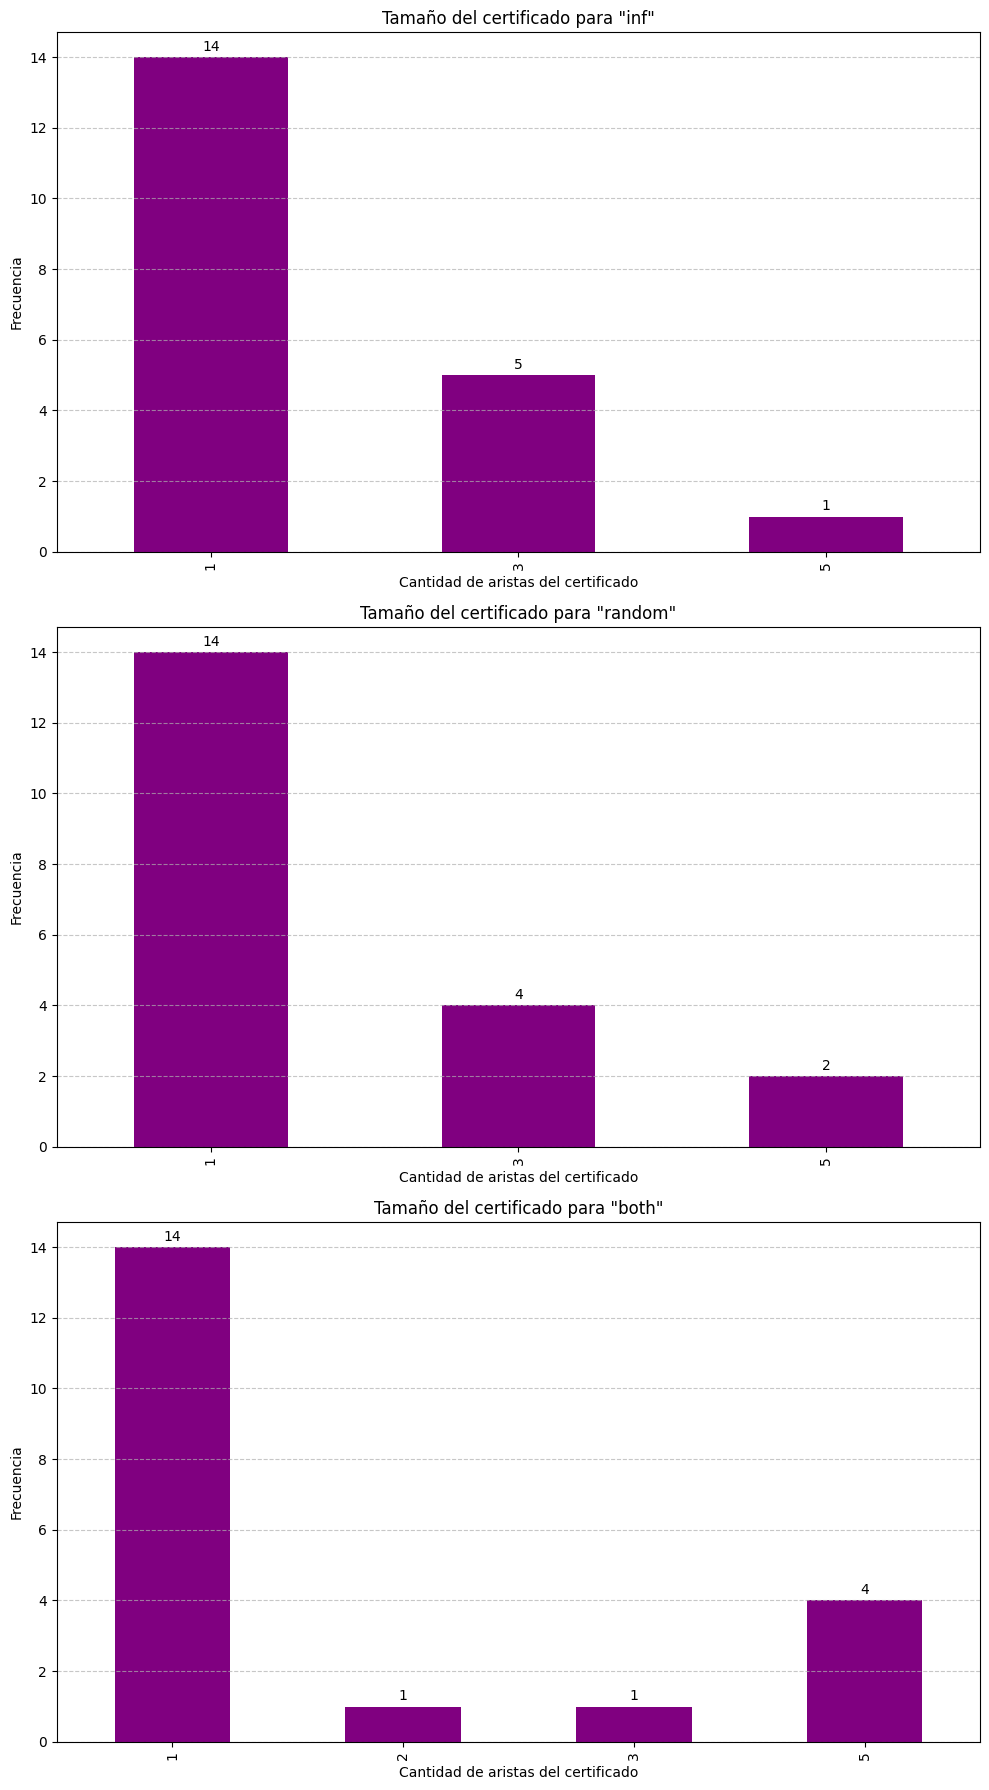

In [76]:
# Realizar experimentos con 17 cliques y 20 instancias
df_results = exp_alg(n_clique=20, n_instance=20)

# Mostrar los primeros resultados
print(df_results.head())

# Graficar resultados para el grafo K4
bar_plot(df_results, clique='k4')


In [77]:
df_results

,clique,inf,random,both,opd
0,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
1,k4,"[(2, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
2,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
3,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
4,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
...,...,...,...,...,...
335,k20,"[(0, 7), (5, 14), (1, 14), (0, 12), (0, 5), (0...","[(0, 7), (5, 14), (1, 14), (0, 12), (0, 5), (0...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x72...
336,k20,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
337,k20,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...
338,k20,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x72...


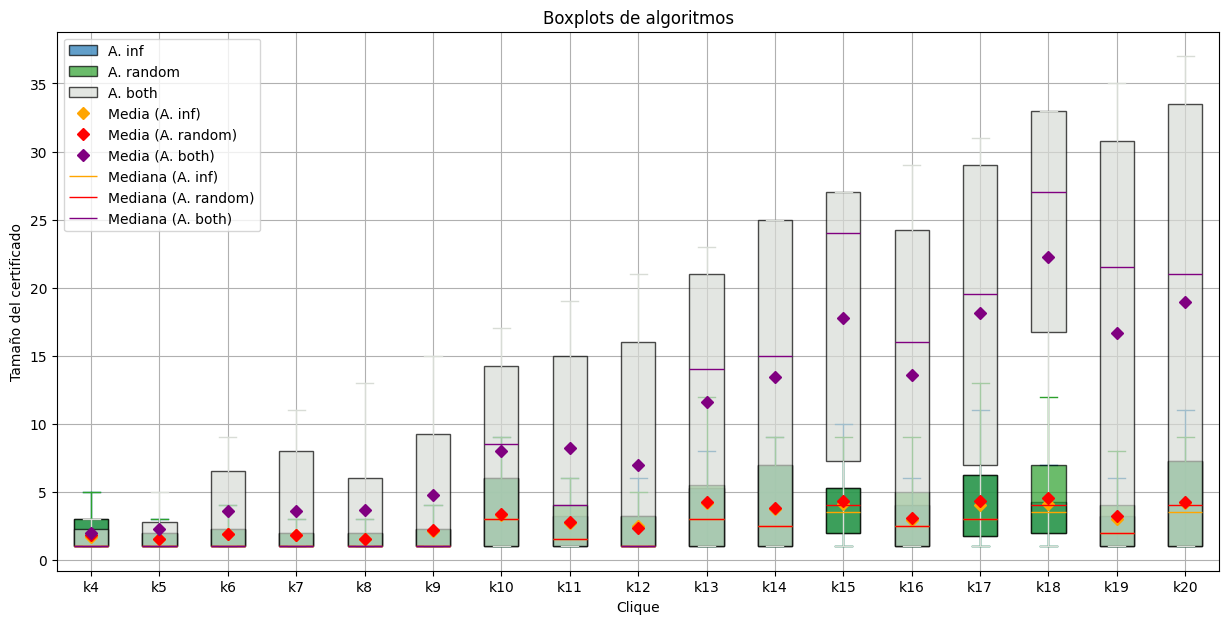

In [78]:
distri_dict = {}
for i, column in enumerate(['inf', 'random', 'both']):
    aux_dict = {} 
    for clique in range(4, 20 + 1):
        # Contar el número de elementos en la columna para cada fila
        counts = df_results[df_results['clique']==f'k{clique}'][column].apply(len)
        counts.reset_index(drop=True, inplace=True)
        # Contar el número de veces que se repite cada cantidad de elementos
        aux_dict[f'k{clique}'] = counts
    
    distri_dict[column] = aux_dict
df_inf = pd.DataFrame(distri_dict['inf'])
df_random = pd.DataFrame(distri_dict['random'])
df_both = pd.DataFrame(distri_dict['both'])
df_list = [df_inf, df_random, df_both]

box_plot(df_list)